<a href="https://colab.research.google.com/github/hasun/ProgrammingCI/blob/master/testClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install xlrd

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


In [3]:
import pandas as pd
df = pd.read_excel('./북한분류학습자료.xlsx')

In [11]:
# cleansing
df ['텍스트'] = df ['텍스트'].str.replace ('\n', '')
df = df[pd.notnull(df['라벨'])]
df = df[pd.notnull(df['텍스트'])]

In [12]:
print(df.head())

   라벨                                                텍스트
0  정치  김정은 총비서에 대한 혁명적 신념과 의리로 충실할 것을 요구o 총비서에 대한 혁명적...
1  정치  최고인민회의 상임위원회 14기 15차 전원회의 진행o ‘최고인민회의 상임위원회 14...
2  정치  김정은 위원장, 中 시진핑 주석에게 ‘당 창건 100주년’ 축전o 김정은 위원장, ...
3  정치  日 상업용 포경선 출항 비난 논평o ‘日 상업용 포경선 출항은 보호동물을 멸종시키는...
4  정치  김정은 위원장, 8기 2차 정치국 확대회의에서 일부 일꾼들 비판o 김정은 위원장, ...


In [13]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

<Figure size 576x432 with 0 Axes>

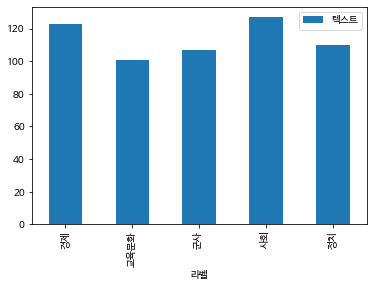

In [14]:
fig = plt.figure(figsize=(8,6))
df.groupby('라벨').count().plot.bar(ylim=0)
plt.show()

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
features = tfidf.fit_transform(df['텍스트'])
features.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['텍스트'], df['라벨'], random_state = 0)

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [32]:
print(clf.predict(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

['경제']


In [33]:
print(clf.predict(count_vect.transform(["I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"])))

['사회']


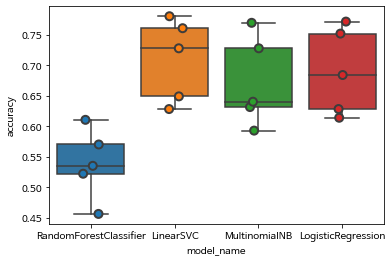

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [35]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.709455
LogisticRegression        0.690141
MultinomialNB             0.672566
RandomForestClassifier    0.538829
Name: accuracy, dtype: float64